<a href="https://colab.research.google.com/github/gmatsuna/alura_imersao_gemini_ia/blob/main/imersao_gemini_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tradutor de Japonês para Português com Foco em Gírias:***\
*Utilidade:* Facilitar a compreensão de gírias e expressões coloquiais japonesas, que muitas vezes não são traduzidas corretamente por tradutores convencionais.\
*Criatividade:* Combinar tradução automática neural (NMT) com um dicionário personalizado de gírias e expressões idiomáticas japonesas.\
*Eficácia:* Medir a qualidade da tradução considerando a fluência e a precisão na tradução de gírias, comparando com traduções humanas.\
*Apresentação:* Desenvolver uma extensão de navegador ou aplicativo móvel que permita aos usuários traduzir textos em japonês com a opção de focar em gírias e expressões informais.

Configuração.

In [58]:
!pip install -q -U google-generativeai

In [59]:
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

In [60]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5
}

In [61]:
safety_settings = {
    "Harassment": "BLOCK_NONE",
    "Hate": "BLOCK_NONE",
    "Sexual": "BLOCK_NONE",
    "Dangerous": "BLOCK_NONE"
}

Modelo.

In [62]:
model = genai.GenerativeModel(model_name='gemini-1.0-pro', generation_config= generation_config, safety_settings= safety_settings)
chat = model.start_chat(history=[])

Executando

In [63]:
!curl -o image.png https://www.ejable.com/wp-content/uploads/2023/07/fire.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5562    0  5562    0     0  19140      0 --:--:-- --:--:-- --:--:-- 19179


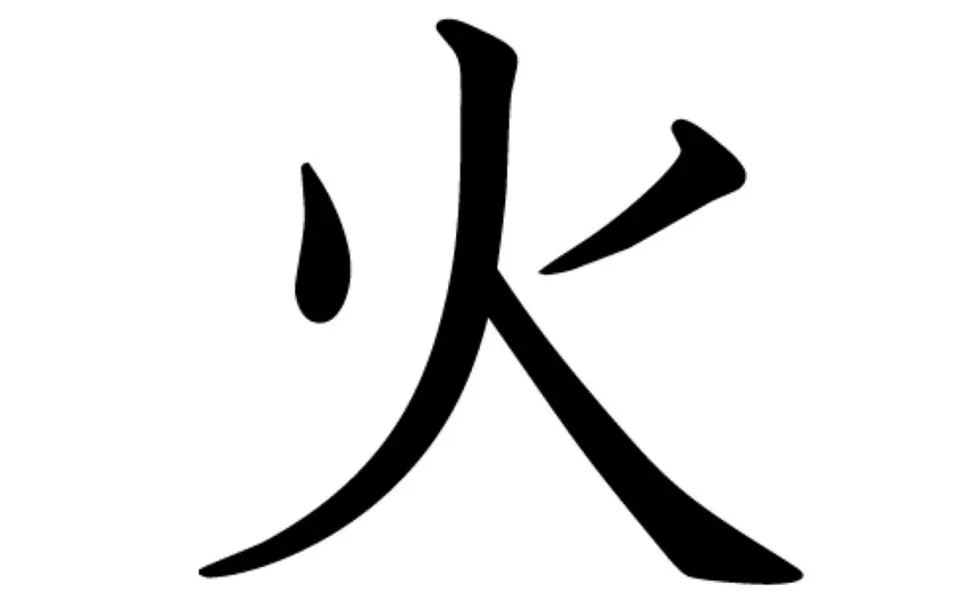

In [64]:
import PIL.Image

img = PIL.Image.open('image.png')
img

In [65]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(["Traduza os kanjis da imagem.", img], stream=True)
response.resolve()

def to_markdown(text):
  text = text.replace('"', "'")
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f"**{message.role}:** {message.parts[0].text}"))
  print()

to_markdown(response.text)

>  O kanji da imagem é 火, que significa 'fogo'.